# Quantum Computing Introduction - Assignment 4
# Names:
# IDs:

Welcome to the fourth assignment! During this assignment, you will use the IBM Qiskit package. This framework offers a huge variety of very interesting functionalities to explore. This assignment will require you to investigate about the proper usage of the tool. Please refer to the [IBM Quantum Documentation](https://qiskit.org/documentation/).

Additionally, you will be asked to work with another quantum programming framework (e.g., Cirq, Q#, etc.). Please, provide also the instructions and/or the inline code to install such tools.


# Python environment

In [14]:
# Imports



The following cell contains some useful definitions and functions for the development of your assignment. They were already introduced in the Qiskit Introduction notebook and included here in case you need them.

In [2]:
# Function: state_to_dirac(quantum_state)
#
# 
# This function accepts an arbitrary state vector and prints it in its corresponding Dirac notation
def state_to_dirac(state):

    # Convert the statevector to dictionary form.
    state_to_dict = state.to_dict()

    return ' '.join('{1:+.4f}|{0}>'.format(key, value)
                      for key, value in state_to_dict.items())


# Function: simulate_circuit_and_obtain_vector(quantum_circuit, number_shots)
#
# 
# This function accepts an arbitrary circuit, performs its state vector simulation and 
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def simulate_circuit_and_obtain_vector(qc, trials = 100000):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    # Convert the resulting state vector in its Dirac notation
    dirac_vector = state_to_dirac(resulting_vector)

    return resulting_vector, dirac_vector



For this assignment you can use whatever simulator you consider useful to solve the exercises. Read carefully the questions and identify the most suitable simulator for your purposes. Moreover, you will have to setup your own [QuantumCircuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit) because we are not going to use only 2-qubit quantum system. Hence, your solution should include the complete setup process to create and simulate the requested quantum circuit.

## Question 1

Determine whether the two presented quantum circuit are equivalents:
![Question1](img/qci_a4_question1.png)

NB: Two quantum circuits are equivalent when their unitary matrices are equal.

In [12]:
# Solution
import qiskit
qc1 = qiskit.QuantumCircuit(2)
qc2 = qiskit.QuantumCircuit(2)
qc1.x(0)
qc2.x(0)
qc1.h(0)
qc2.h(0)
print(qiskit.quantum_info.Statevector(qc1))
print(qiskit.quantum_info.Statevector(qc2))
qc1.swap(0,1)
qc2.cx(0,1)
qc2.cx(1,0)
qc2.cx(0,1)
print(qiskit.quantum_info.Statevector(qc1))
print(qiskit.quantum_info.Statevector(qc2))
print(qc1)
print(qc2)
#as visible by example, they give the same result, H was used to show that it isn't just one state or 0 which does this.
#yes, i dont prove this works for all states, but the point is clear enough, the result is identical


Statevector([ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
              0.        +0.j],
            dims=(2, 2))
Statevector([ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
              0.        +0.j],
            dims=(2, 2))
Statevector([ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
Statevector([ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
     ┌───┐┌───┐   
q_0: ┤ X ├┤ H ├─X─
     └───┘└───┘ │ 
q_1: ───────────X─
                  
     ┌───┐┌───┐     ┌───┐     
q_0: ┤ X ├┤ H ├──■──┤ X ├──■──
     └───┘└───┘┌─┴─┐└─┬─┘┌─┴─┐
q_1: ──────────┤ X ├──■──┤ X ├
               └───┘     └───┘


## Question 2

Implement the following quantum circuit and show the resulting state vector:
![Question2](img/qci_a4_question2.png)

In [23]:
# Solution
import qiskit

QQ = qiskit.QuantumCircuit(2)
QQ.h(0)
QQ.z(0)
QQ.x(1)
QQ.cx(0,1)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
# ^ bell state maker

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
     ┌───┐┌───┐     
q_0: ┤ H ├┤ Z ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ X ├─────┤ X ├
     └───┘     └───┘


## Question 3

During the lecture: "Fundamentals: A Multi-Qubit World", I  presented four different Bell states. Starting from a $\left| 11 \right\rangle$ state, implement a quantum circuit to create and print the Bell state $\left| \Phi^+ \right\rangle$.

In [50]:
# Solution
import qiskit

QQ = qiskit.QuantumCircuit(2)
QQ.initialize([0,0,0,1])
print(qiskit.quantum_info.Statevector(QQ))
QQ.x(0)
QQ.x(1) #yeah if you entangled them before it would have been a little harder :3
QQ.h(1)
QQ.cx(1,0)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ) 

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
     ┌──────────────────────┐┌───┐     ┌───┐
q_0: ┤0                     ├┤ X ├─────┤ X ├
     │  Initialize(0,0,0,1) │├───┤┌───┐└─┬─┘
q_1: ┤1                     ├┤ X ├┤ H ├──■──
     └──────────────────────┘└───┘└───┘     


## Question 4

After an extensive research on the web, one of your classmates identified a quantum circuit supposed to prepare one of the Bell states. However, you are not completely sure about its validity, hence your are going to implement such circuit in Qiskit to figure it out. Assume $\left| q_{1}q_{0} \right\rangle$ = $\left| 00 \right\rangle$. 

Implement the following circuit, execute the simulator and print the resulting vector state
![Question4](img/qci_a4_question4.png)

NB: Sometimes, when implementing bigger quantum circuits, it could be useful to include a [Barrier](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.Barrier). This [command](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#barrier) allows you to set a "barrier" in your circuit (for example, just before the measurement). This barrier could be useful to properly visualize and delimitate the different sections of your code.

In [65]:
# Solution
import qiskit

QQ = qiskit.QuantumCircuit(2)
QQ.h(1)
QQ.cx(1,0)
QQ.x(0)
QQ.z(1)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ) #thats a bellstate alright, 1/sqrt(2)(|01> - |10>) = |Psi^->

Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
          ┌───┐┌───┐
q_0: ─────┤ X ├┤ X ├
     ┌───┐└─┬─┘├───┤
q_1: ┤ H ├──■──┤ Z ├
     └───┘     └───┘


## Question 5

Is the resulting state obtained in `Question 4` an entangled state? Why? Is it a valid Bell state (if so, indicate which state would that be). Compute its concurrence.

In [90]:
# Solution = 1/sqrt(2)(|01> - |10>) = |Psi^->
import qiskit

QQ = qiskit.QuantumCircuit(2)
QQ.h(1)
QQ.cx(1,0)
QQ.x(0)
QQ.z(1)
Res = qiskit.quantum_info.Statevector(QQ)
print(Res)
Concurrence = 2*abs(Res[0]*Res[3]-Res[1]*Res[2])
print(Concurrence) #awh god dammit, floating point errors be damned, but it does work! so non zero concurrence and its |psi^->
print(QQ)

Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
0.9999999999999998
          ┌───┐┌───┐
q_0: ─────┤ X ├┤ X ├
     ┌───┐└─┬─┘├───┤
q_1: ┤ H ├──■──┤ Z ├
     └───┘     └───┘


## Question 6

Without modifying the quantum circuit that you just created (the tentative Bell state circuit). Perform a 50000 shots simulations and plot the resulting probabilities.

Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
          ┌───┐┌───┐
q_0: ─────┤ X ├┤ X ├
     ┌───┐└─┬─┘├───┤
q_1: ┤ H ├──■──┤ Z ├
     └───┘     └───┘
[[('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10', 0.5)], [('01', 0.5), ('10

TypeError: unhashable type: 'numpy.ndarray'

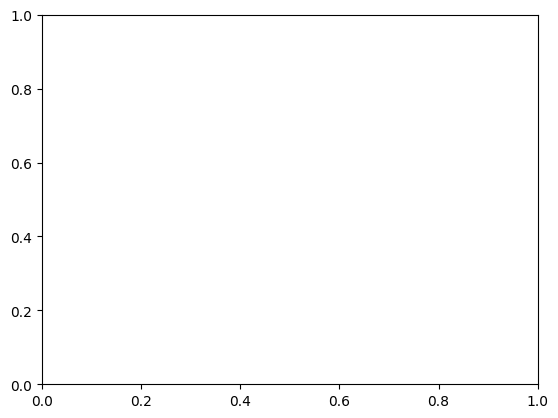

In [106]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    print(RR)
    counts = 0
    for i in RR:
        for z in range(len(i)/2):
            if counts == 0:
                counts = [[i[z][0]],i[z][1]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(1)
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(2)
QQ.h(1)
QQ.cx(1,0)
QQ.x(0)
QQ.z(1)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)

res = RunSim(QQ, 50)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()

# Quantum Inspire

I would say that it is enough about Qiskit (for now :)). Let's try the Dutch innitiative [Quantum Inspire](https://www.quantum-inspire.com/). This tool allows you to work both with an emulator: `QX Single-node` (26 qubits max) and with actual quantum processors: `Spin-2` (2 qubits) and `Starmon-5` (5 qubits). You have to create an account (for free, with some limitations of course) but that should not be a problem (no credit card needed for the Basic account).

## Question 7

Using Quantum Inspire, create the quantum circuit to produce the Bell state requested below (depending on your team):

| Bell state | Groups |
| :- | - |
| $\left| \Phi^{-} \right\rangle$ | 1, 7, 10, 11 |
| $\left| \Psi^{+} \right\rangle$ | 3, 4, 5, 8 |
| $\left| \Psi^{-} \right\rangle$ | 2, 6, 9, 12 |

Perform a simulation (16384 shots max) and plot the resulting probabilities. Insert here a screen capture of the obtained results, including the source code and the quantum circuit.

In [ ]:
# Solution



# Question 8

During the lecture: "Fundamentals: A Multi-Qubit World", I  presented a quantum entanglement swapping circuit (creating entanglement between two non interacting qubits). Using Quantum Inspire, create such circuit, perform the simulation and plot the resulting probabilities. Did your circuit produced the requested Bell state? (Insert here a screen capture of the obtained results, including the source code and the quantum circuit.)

![Question8](img/qci_a4_question8.png)

In [ ]:
# Solution



# Other quantum programming frameworks

Now, let's try another quantum programming framework. The teams will test one of the proposed quantum programming environments based on the following:

| Platform | Groups |
| :- | - |
| Cirq | 1, 5, 8, 9, 10, 12 |
| Q# | 2, 3, 4, 6, 7, 11 |

## Question 9

Using the assigned quantum programming framework, implement the quantum circuit from `Question 8`, draw the circuit, perform the simulation and plot the results

In [ ]:
# Solution



## Question 10

One of the teachers has “encrypted” a secret 3–bit code in qubits $\left| q_{2}q_{1}q_{0} \right\rangle$ from the following quantum circuit. The circuit must be initialized as $\left| q_{3}q_{2}q_{1}q_{0} \right\rangle = \left| 1000 \right\rangle$.

![Question10](img/qci_a4_question10.png)

1. Implement and draw the circuit.
2. What is the resulting vector state. What would you say that the secret code is? Why?
3. Perform a simulation of the proposed circuit and plot the resulting probabilities.
4. Did your results confirm the secret code that you estimated in `Question 10.2`?


In [ ]:
# Solution

